In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.utils as utils

In [2]:
class BruteOSFMetric(metrics.BaseMetric):
    """Assume I can't trust the slewtime or visittime colums"""
    def __init__(self, metricName='BruteOSFMetric',
            expTimeCol='expTime', mjdCol='expMJD', maxgap=10., fudge=0, **kwargs):
        self.expTimeCol = expTimeCol
        self.maxgap = maxgap/60./24. # convert from min to days
        self.mjdCol = mjdCol
        self.fudge = fudge
        super(BruteOSFMetric, self).__init__(col=[self.expTimeCol, mjdCol],
                                                        metricName=metricName, units='OpenShutter/TotalTime',
                                                        **kwargs)
                                                                                                        
    def run(self, dataSlice, slicePoint=None):
        times = np.sort(dataSlice[self.mjdCol])
        diff = np.diff(times)
        good = np.where(diff < self.maxgap)
        openTime = np.sum(diff[good])*24.*3600.
        result = np.sum(dataSlice[self.expTimeCol]+self.fudge) / float(openTime)
        return result

In [3]:
conns = []
colmap_dict = {'slewtime': 'slewtime', 'exptime': 'exptime', 'visittime': 'exptime', 'mjd':'mjd'}

files = ['one_filter_north.db', 'one_filter_south.db', 'one_filter.db',
         'one_filter_dd.db', 'six_filter.db', 'one_filter_pairs.db', 'one_filter_north_pairs.db',
         'one_filter_10yr.db', 'one_filter_dither.db', 'rolling_1.db', 'rolling_2.db']
labels=['North', 'South', 'full sky', 'DD', '6 filters', 'pairs', 'north pairs', '10-year',
        'dithered', 'rolling 1', 'rolling 2']

conns = [db.Database(file) for file in files]

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['dec', 'mjd', 'RA', 'airmass', 'exptime'].
Found 293802 visits
Running:  ['one_filter_north_db_BruteOSFMetric_UNIS', 'one_filter_north_db_Median_normairmass_UNIS']
Completed metric generation.
Running:  ['one_filter_north_db_PairFraction_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.
monopole: 0.0773052  dipole: lon: -147.526, lat: 68.5, amp: 0.138235
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['dec', 'mjd', 'RA', 'airmass', 'exptime'].
Found 304119 visits
Running:  ['one_filter_south_db_BruteOSFMetric_UNIS', 'one_filter_south_db_Median_normairmass_UNIS']
Completed metric generation.
Running:  ['one_filter_south_db_PairFraction_HEAL']
Compl

/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 383 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.950437  dipole: lon: -22.728, lat: 61.6957, amp: 0.0490752
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['dec', 'mjd', 'RA', 'airmass', 'exptime'].
Found 295876 visits
Running:  ['one_filter_north_pairs_db_BruteOSFMetric_UNIS', 'one_filter_north_pairs_db_Median_normairmass_UNIS']
Completed metric generation.
Running:  ['one_filter_north_pairs_db_PairFraction_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 436 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 0.95455  dipole: lon: -67.1527, lat: 63.8183, amp: 0.0436779
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['dec', 'mjd', 'RA', 'airmass', 'exptime'].
Found 3022980 visits
Running:  ['one_filter_10yr_db_BruteOSFMetric_UNIS', 'one_filter_10yr_db_Median_normairmass_UNIS']
Completed metric generation.
Running:  ['one_filter_10yr_db_PairFraction_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 0.0918347  dipole: lon: -176.839, lat: -44.5634, amp: 0.117848
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['dec', 'mjd', 'RA', 'airmass', 'exptime'].
Found 288031 visits
Running:  ['one_filter_dither_db_BruteOSFMetric_UNIS', 'one_filter_dither_db_Median_normairmass_UNIS']
Completed metric generation.
Running:  ['one_filter_dither_db_PairFraction_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 0.0935617  dipole: lon: 153.74, lat: -68.8173, amp: 0.145519
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['dec', 'mjd', 'RA', 'airmass', 'exptime'].
Found 288009 visits
Running:  ['rolling_1_db_BruteOSFMetric_UNIS', 'rolling_1_db_Median_normairmass_UNIS']
Completed metric generation.
Running:  ['rolling_1_db_PairFraction_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 0.149464  dipole: lon: 160.23, lat: -64.2438, amp: 0.19843
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['dec', 'mjd', 'RA', 'airmass', 'exptime'].
Found 592734 visits
Running:  ['rolling_2_db_BruteOSFMetric_UNIS', 'rolling_2_db_Median_normairmass_UNIS']
Completed metric generation.
Running:  ['rolling_2_db_PairFraction_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 0.140566  dipole: lon: 159.55, lat: -61.9142, amp: 0.199159
Plotting complete.


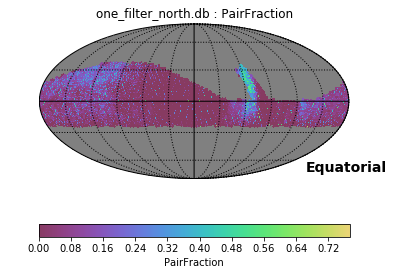

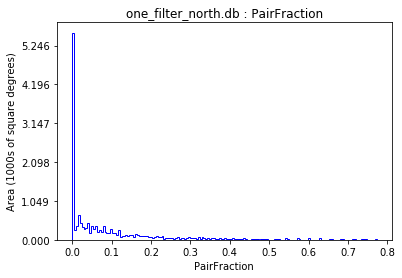

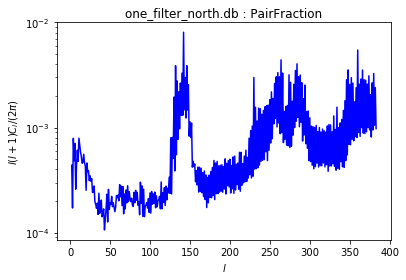

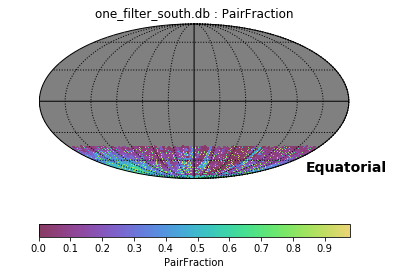

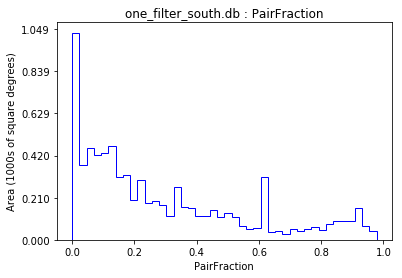

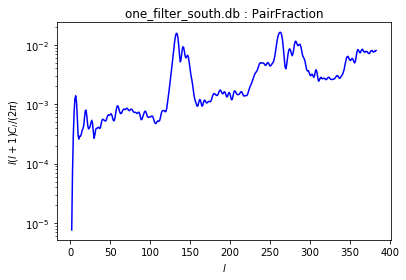

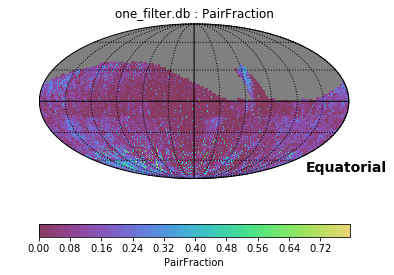

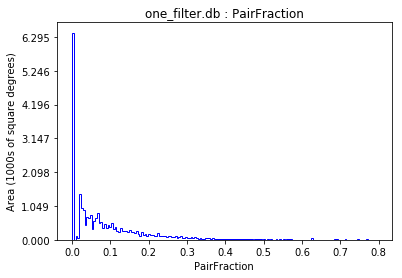

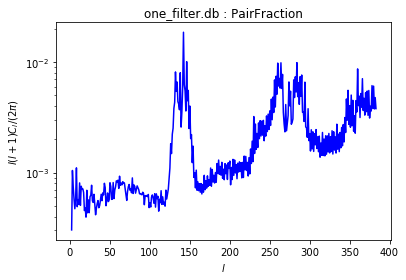

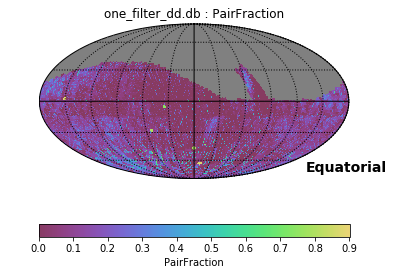

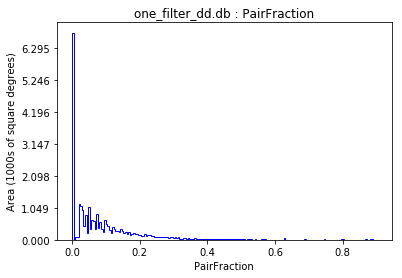

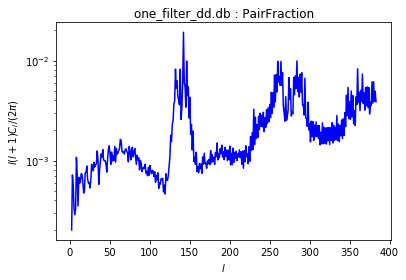

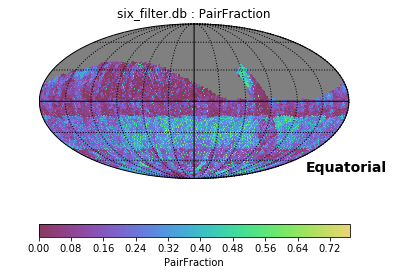

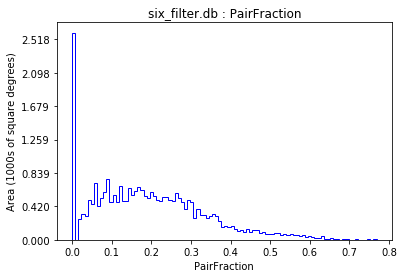

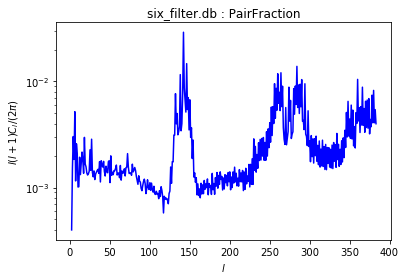

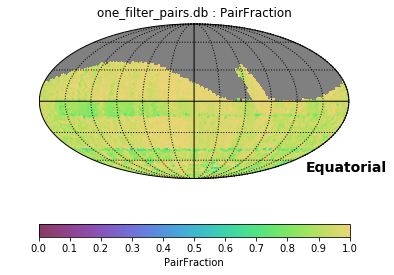

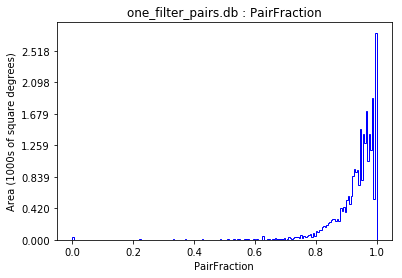

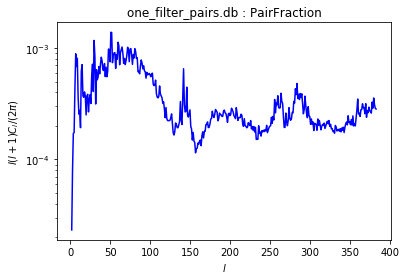

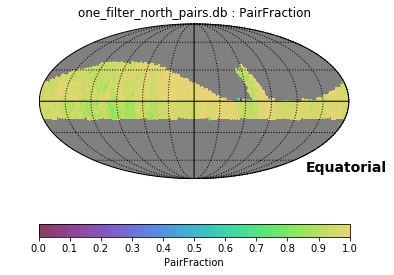

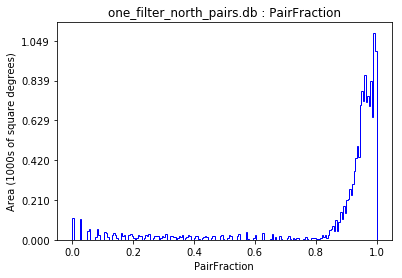

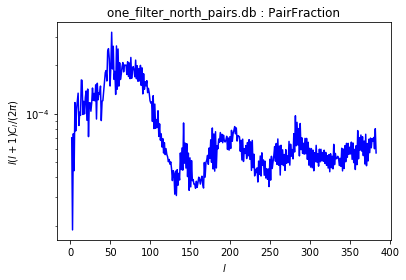

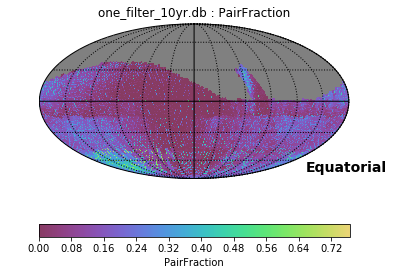

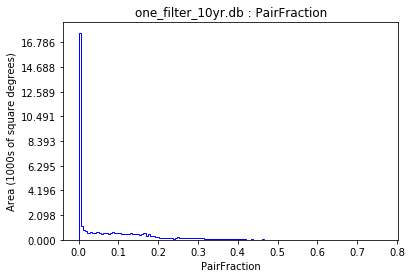

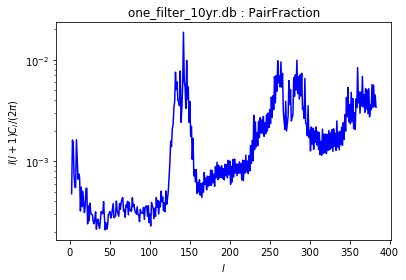

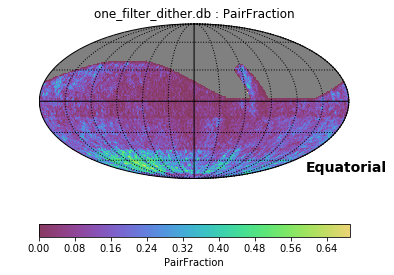

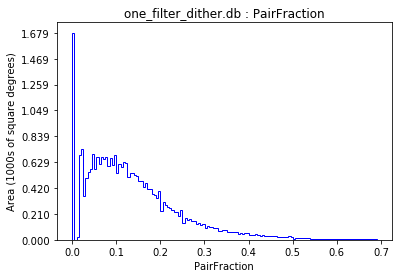

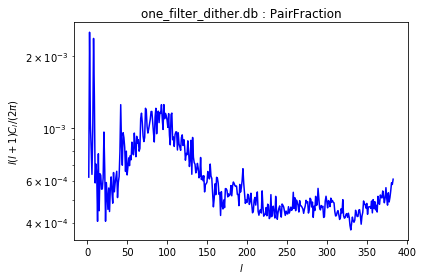

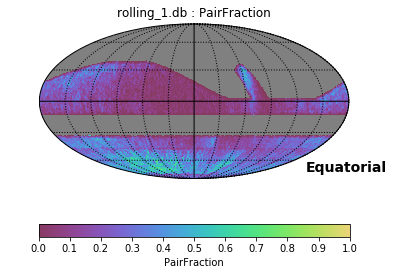

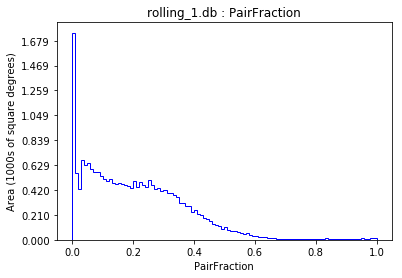

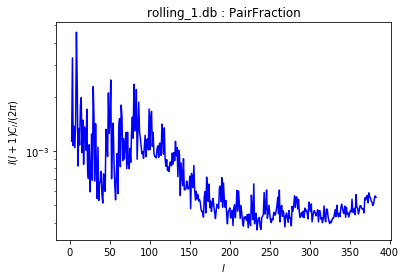

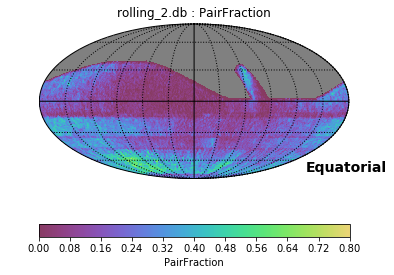

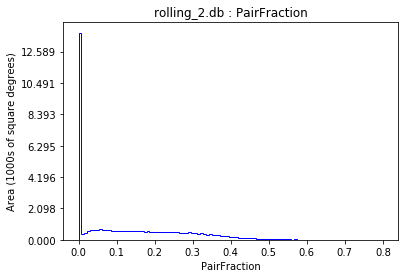

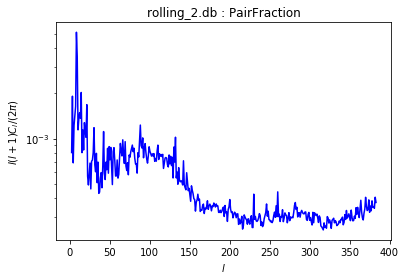

In [4]:
results = []
i=0
for conn, filename in zip(conns,files):
    bundleList = []
    sql = ''
    slicer = slicers.UniSlicer()
    metric = BruteOSFMetric(expTimeCol=colmap_dict['exptime'],
                                   mjdCol=colmap_dict['mjd'])
    bundle = metricBundles.MetricBundle(metric, slicer, sql)
    bundleList.append(bundle)
    
    stacker = stackers.NormAirmassStacker(decCol='dec')
    metric = metrics.MedianMetric(col='normairmass')
    bundle = metricBundles.MetricBundle(metric, slicer, sql, stackerList=[stacker])
    bundleList.append(bundle)
    
    slicer = slicers.HealpixSlicer(lonCol='RA', latCol='dec')
    metric = metrics.PairFractionMetric(timeCol=colmap_dict['mjd'])
    bundle = metricBundles.MetricBundle(metric, slicer, sql)
    bundleList.append(bundle)
    for bundle in bundleList:
        bundle.setRunName(filename.split('/')[0])
    
    bd = metricBundles.makeBundlesDictFromList(bundleList)
    group = metricBundles.MetricBundleGroup(bd, conn, outDir='mafOut')
    group.runAll()
    group.plotAll(closefigs=False)
    results.append(bundleList)

In [5]:
nairs = []
osfs = []
for result in results:
    nairs.append(result[1].metricValues)
    osfs.append(result[0].metricValues)

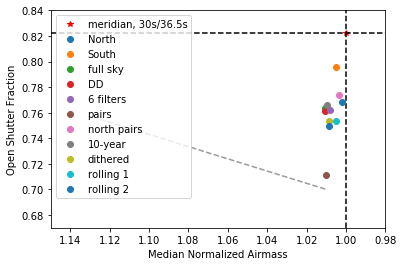

In [6]:
max_osf = 30./(32.+4.5)
plt.plot(1, max_osf, 'r*', label='meridian, 30s/36.5s')
plt.xlabel('Median Normalized Airmass')
plt.ylabel('Open Shutter Fraction')
plt.axhline(y=max_osf, linestyle='--', color='k')
plt.axvline(x=1., linestyle='--', color='k')
plt.xlim([1.15, .98])
plt.ylim([.67, .84])

for i, dummy in enumerate(nairs):
    plt.plot(nairs[i], osfs[i], 'o', label=labels[i])
#plt.plot(nairs[0:2], osfs[0:2], 'ko', label='regular')
#plt.plot(nairs[2:4], osfs[2:4], 'go', label='pairs')

#reference opsim line
plt.plot([1.125,1.01], [0.755, 0.7], 'k--', alpha=0.4)
plt.legend(loc='upper left')